In [ ]:
import numpy as np
import pandas as pd
import json
import scipy
import ast
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from ast import literal_eval
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', sep=',(?=\S)', engine='python')

df['friends'] = [json.loads(x) for x in df['friends']]
df['id'] = [int(str(x).replace('"', '')) for x in df['id']]
df['screenName'] = [x.replace('"', '') for x in df['screenName']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:1: DeprecationWarning: invalid escape sequence '\S'
<>:1: DeprecationWarning: invalid escape sequence '\S'
<ipython-input-3-4166a5e6f880>:1: DeprecationWarning: invalid escape sequence '\S'
  df = pd.read_csv('/content/drive/MyDrive/data.csv', sep=',(?=\S)', engine='python')


In [ ]:
# Afficher les premières lignes et les informations générales
print("Aperçu des données :")
print(df.head())
print("\nInformations générales :")
df.info()


Aperçu des données :
                   id       screenName                   tags  \
0          1969527638  LlngoMakeEmCum_  [ "#nationaldogday" ]   
1            51878493     _notmichelle  [ "#nationaldogday" ]   
2          1393409100        jesseayye          [ "#narcos" ]   
4  710130422907207680    sarahdorat_16  [ "#nationaldogday" ]   
5          3649469655  wanderIustregui   [ "#veranomtv2016" ]   

                                              avatar  followersCount  \
0  "http://pbs.twimg.com/profile_images/534286217...             319   
1  "http://pbs.twimg.com/profile_images/761977602...             275   
2  "http://pbs.twimg.com/profile_images/713282938...             120   
4  "http://pbs.twimg.com/profile_images/767180520...             128   
5  "http://pbs.twimg.com/profile_images/762400806...             479   

   friendsCount  lang       lastSeen               tweetId  \
0           112  "en"  1472271687519  "769310701580083200"   
1           115  "en"  14722706

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


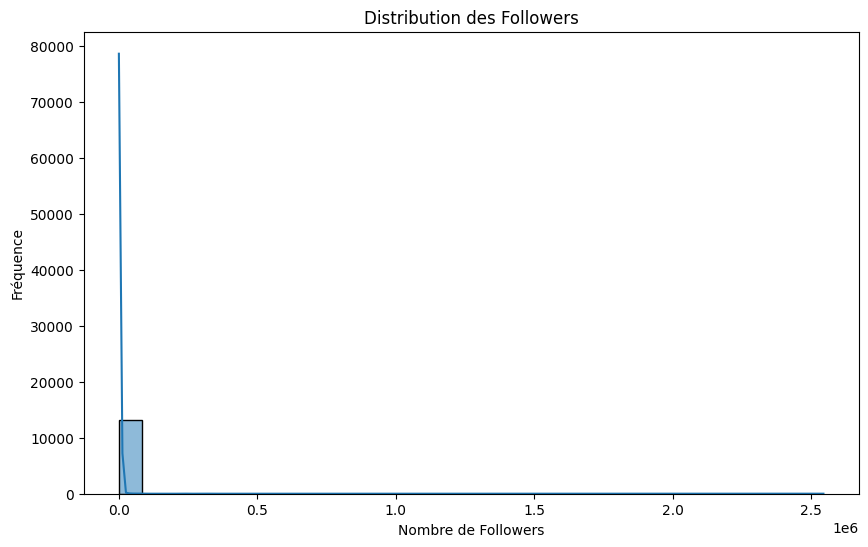

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['followersCount'], bins=30, kde=True)
plt.title("Distribution des Followers")
plt.xlabel("Nombre de Followers")
plt.ylabel("Fréquence")
plt.show()



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


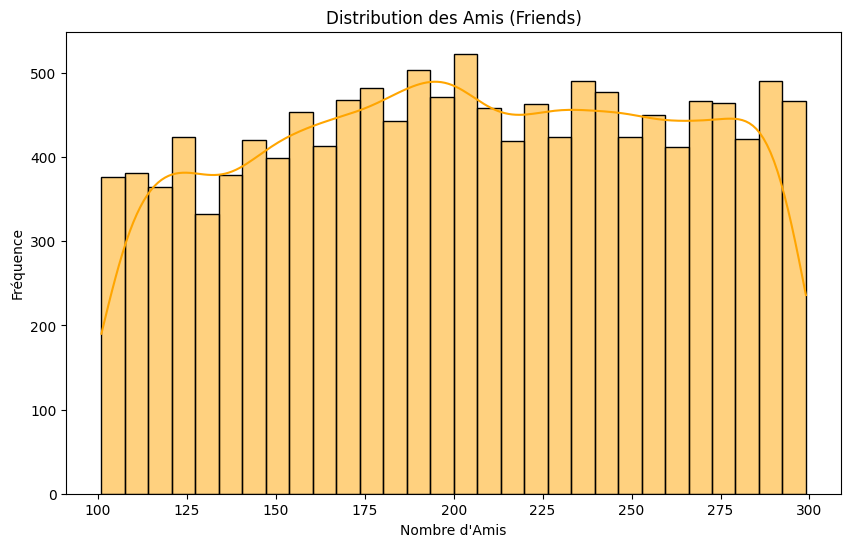

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['friendsCount'], bins=30, kde=True, color='orange')
plt.title("Distribution des Amis (Friends)")
plt.xlabel("Nombre d'Amis")
plt.ylabel("Fréquence")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


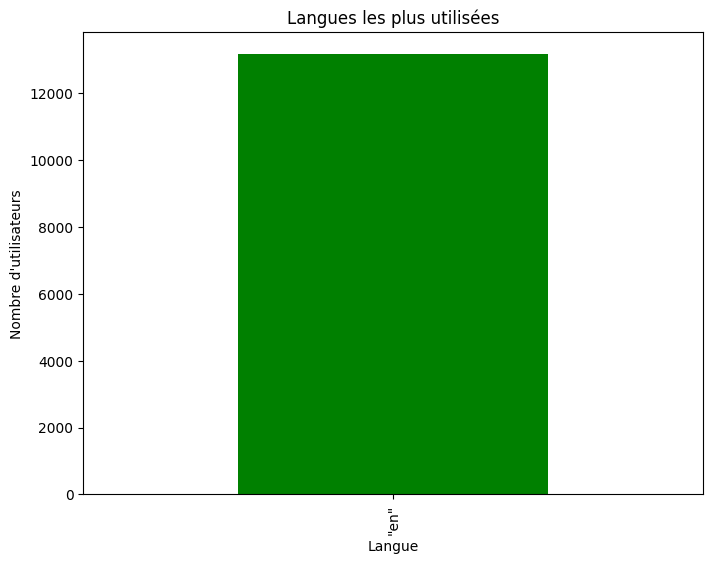

In [ ]:
plt.figure(figsize=(8, 6))
df['lang'].value_counts().plot(kind='bar', color='green')
plt.title("Langues les plus utilisées")
plt.xlabel("Langue")
plt.ylabel("Nombre d'utilisateurs")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-10-0e3624924457>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Hashtag', data=hashtags_df, palette='viridis')


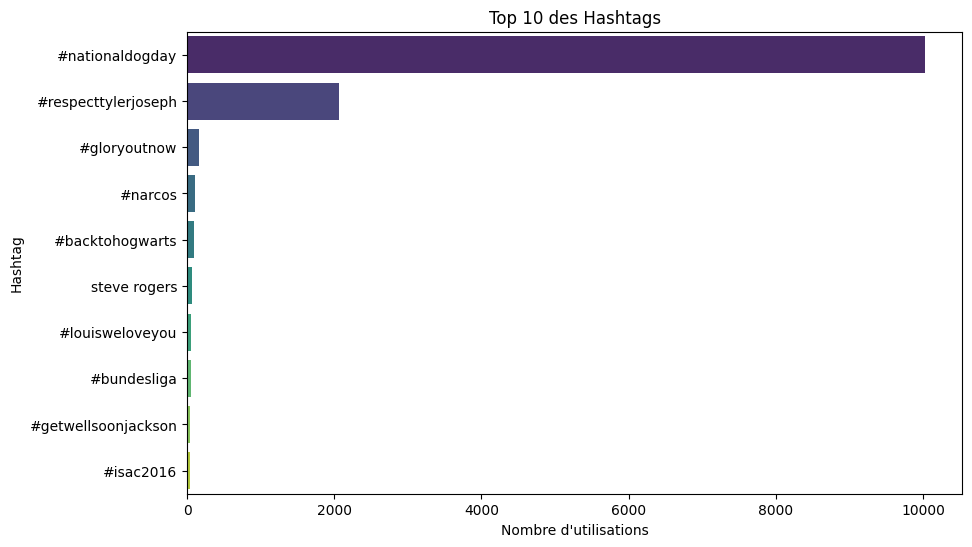

In [ ]:
from collections import Counter

# Extraire les hashtags
hashtags = [tag for tags_list in df['tags'] for tag in json.loads(tags_list)]
top_hashtags = Counter(hashtags).most_common(10)

# Visualiser
hashtags_df = pd.DataFrame(top_hashtags, columns=['Hashtag', 'Count'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Hashtag', data=hashtags_df, palette='viridis')
plt.title("Top 10 des Hashtags")
plt.xlabel("Nombre d'utilisations")
plt.ylabel("Hashtag")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


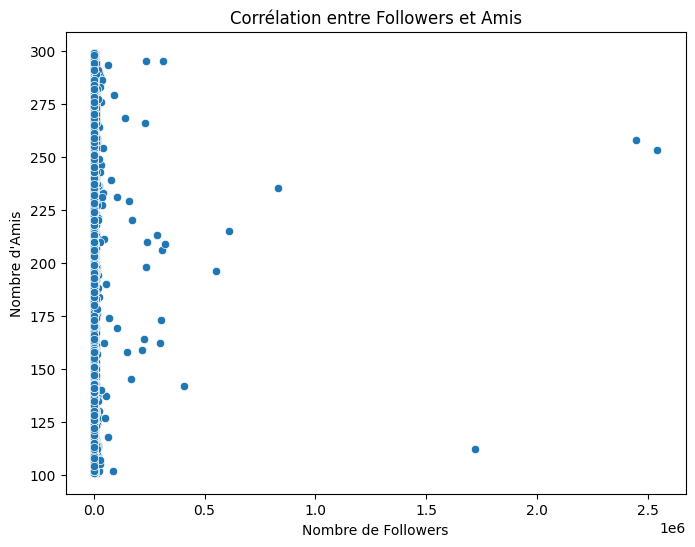

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='followersCount', y='friendsCount', data=df)
plt.title("Corrélation entre Followers et Amis")
plt.xlabel("Nombre de Followers")
plt.ylabel("Nombre d'Amis")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


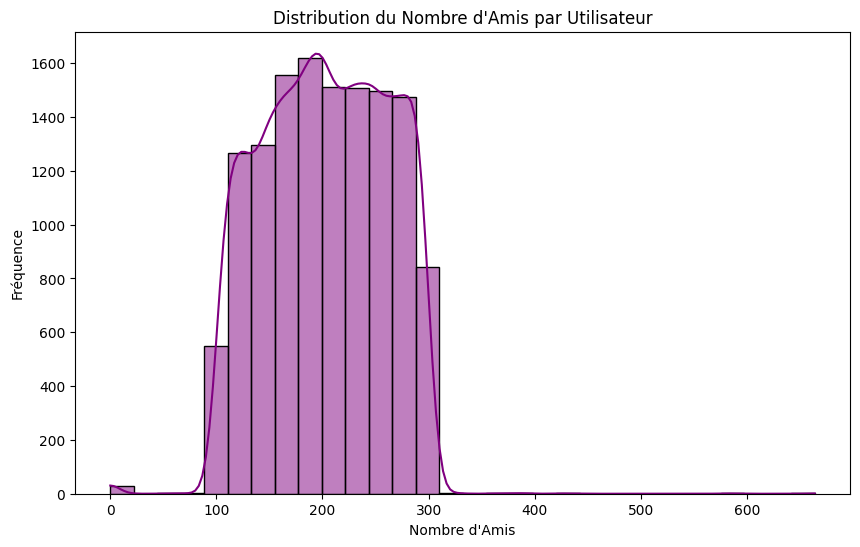

In [ ]:
# Nombre d'amis par utilisateur
df['friends_count'] = df['friends'].apply(len)

# Distribution du nombre d'amis
plt.figure(figsize=(10, 6))
sns.histplot(df['friends_count'], bins=30, kde=True, color='purple')
plt.title("Distribution du Nombre d'Amis par Utilisateur")
plt.xlabel("Nombre d'Amis")
plt.ylabel("Fréquence")
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-13-41fba3578cb1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='friends_count', y='screenName', data=top_friends, palette='coolwarm')


            screenName  friends_count
24372     ProgectZitor            664
28904          EvstJay            582
9842   Pinkybarbiedope            426
871        sandspike53            391
12010       DVNNYFVCTS            383
17901         ltsDrift            364
23827  MagnoliaPointe2            328
20791     slaydontplay            316
28825     ayahaliahmad            316
29532    YajairaLeal98            308


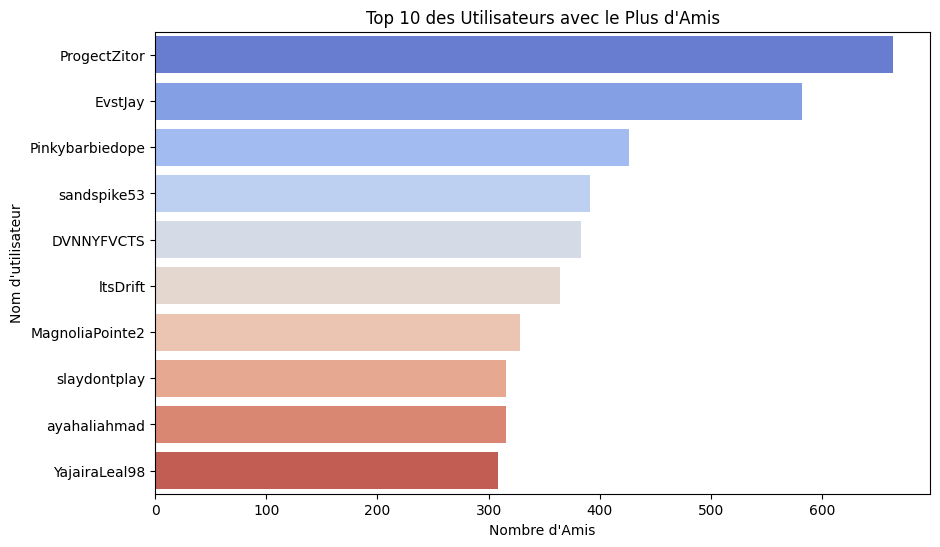

In [ ]:
# Top 10 des utilisateurs avec le plus d'amis
top_friends = df.nlargest(10, 'friends_count')[['screenName', 'friends_count']]
print(top_friends)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='friends_count', y='screenName', data=top_friends, palette='coolwarm')
plt.title("Top 10 des Utilisateurs avec le Plus d'Amis")
plt.xlabel("Nombre d'Amis")
plt.ylabel("Nom d'utilisateur")
plt.show()
